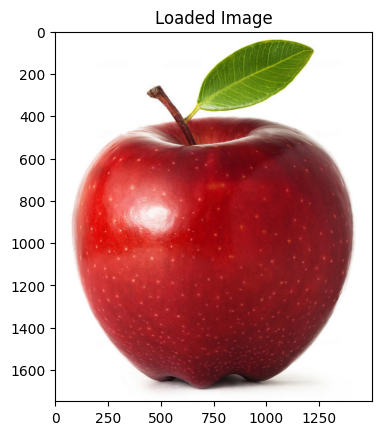

In [5]:
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
from PIL import Image
from numpy import asarray

# Load and display the image using PIL
image_path = r"D:\6m_NIC\images\apple1.jpg"
image_o = Image.open(image_path)
image_o.show()  # This opens the image in the default image viewer

# Convert the image to a numpy array
imggg = asarray(image_o)

# Display the image using matplotlib
plt.imshow(imggg)
plt.title('Loaded Image')
plt.axis('on')  # Turn off axis labels
plt.show()

# print(imggg.shape)
# for item in imggg:
#     print(item)


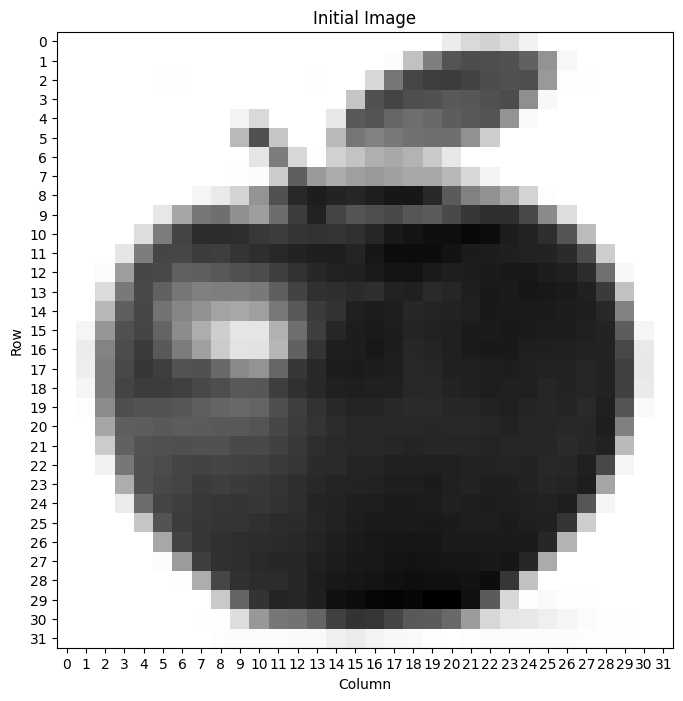

Size= (32, 32)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from numpy import asarray

# Define the function to plot the image
def plot_image(image_array, title):
    plt.figure(figsize=(8, 8))  # Adjust size as needed

    # Display the image
    plt.imshow(image_array, cmap='gray', interpolation='nearest')

    # Set title and axis labels
    plt.title(title)
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(ticks=np.arange(image_array.shape[1]), labels=np.arange(image_array.shape[1]))
    plt.yticks(ticks=np.arange(image_array.shape[0]), labels=np.arange(image_array.shape[0]))
    plt.grid(False)
    plt.show()

# Load and process the image
image_path = r"D:\6m_NIC\images\apple1.jpg"
image_o = Image.open(image_path).convert('RGB')  # Load the image in RGB mode
image_o = image_o.resize((32, 32))  # Resize to 32x32 for pixelation effect
imggg_ = asarray(image_o.convert('L'))  # Convert image to grayscale array

# Plot the pixelated image
plot_image(imggg_, 'Initial Image')
print("Size=", imggg_.shape)


In [8]:
import numpy as np
from PIL import Image
from numpy import asarray

# Load and process the image
image_path = r"D:\6m_NIC\images\apple1.jpg"
image_o = Image.open(image_path).convert('RGB')  # Load the image in RGB mode
image_o = image_o.resize((32, 32))  # Resize to 32x32 for pixelation effect
imggg_ = asarray(image_o.convert('L'))  # Convert image to grayscale array

def amplitude_encode(img_data):
    # Calculate the RMS value
    rms_value = np.sqrt(np.sum(img_data**2))
    
    # Create normalized image
    image_norm = img_data / rms_value
    
    # Return the normalized image as a numpy array
    return image_norm

# Horizontal: Original image
h_norm_image_32_rgb = amplitude_encode(imggg_)
print("Horizontal image normalized coefficients", h_norm_image_32_rgb)

print()

# Vertical: Transpose of Original image
v_norm_image_32_rgb = amplitude_encode(imggg_.T)
print("Vertical image normalized coefficients", v_norm_image_32_rgb)

print("Size of 1D array:", h_norm_image_32_rgb.size)
print("Size of 1D array:", v_norm_image_32_rgb.size)


Horizontal image normalized coefficients [[0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 ...
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 [0.93302119 0.93302119 0.93302119 ... 0.92936228 0.93302119 0.93302119]
 [0.93302119 0.93302119 0.93302119 ... 0.92936228 0.93302119 0.93302119]]

Vertical image normalized coefficients [[0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 ...
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.92936228 0.92936228]
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]
 [0.93302119 0.93302119 0.93302119 ... 0.93302119 0.93302119 0.93302119]]
Size of 1D array: 1024
Size of 

In [9]:
#we require N=log(32*32) qubits 
#N=10

data_q_32_rgb = 10
ancillary_q_32_rgb = 1
total_q_32_rgb = data_q_32_rgb + ancillary_q_32_rgb

# Initialize the amplitude permutation unitary
Amp_permutation_unitary_32_rgb = np.identity(2**total_q_32_rgb)
print(Amp_permutation_unitary_32_rgb)
Amp_permutation_unitary_32_rgb=np.roll(Amp_permutation_unitary_32_rgb,1,axis=1)
print()
print()
print()
print("shift Amplitude permutation matrix by 1 unit to the right column wise")
print()
print(Amp_permutation_unitary_32_rgb)
print()
print("we will later use this for while applying hadamard operation to image coefficient vectors")
print()
print(Amp_permutation_unitary_32_rgb.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]



shift Amplitude permutation matrix by 1 unit to the right column wise

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]

we will later use this for while applying hadamard operation to image coefficient vectors

(2048, 2048)


Circuits saved as 'qc_h_32_rgb.png' and 'qc_v_32_rgb.png'


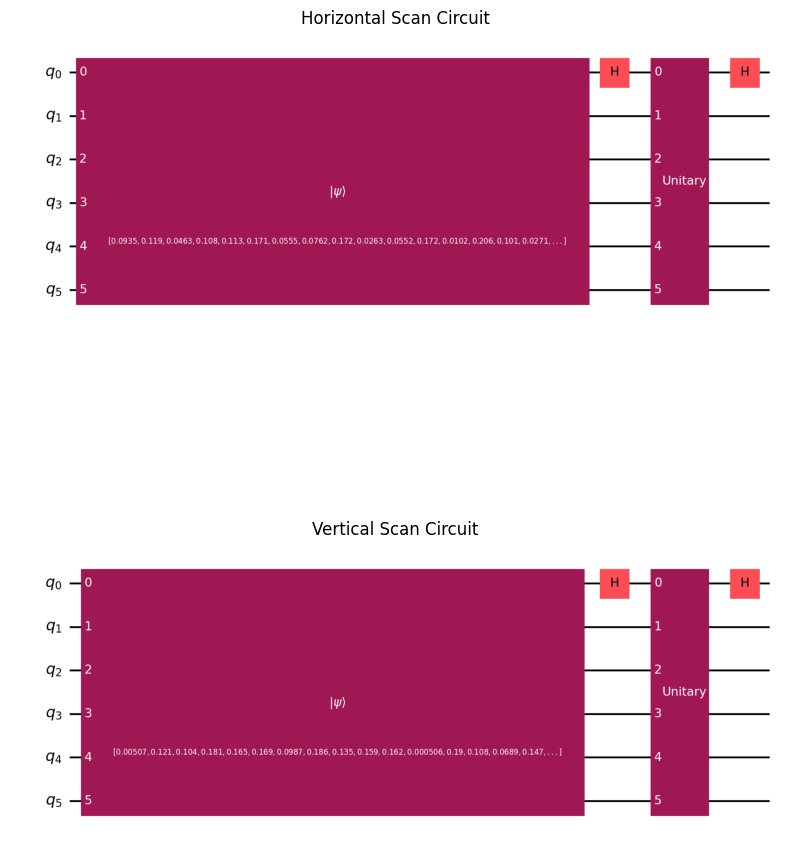

In [19]:
import numpy as np
from qiskit import QuantumCircuit
from matplotlib import pyplot as plt

# Ensure the length of state vector is correct and normalized
def prepare_normalized_state_vector(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:
        raise ValueError("State vector cannot be all zeros.")
    return vector / norm

# Example dimensions
num_qubits = 6  # Set this to your actual number of qubits
vector_size = 2**num_qubits

# Ensure the state vectors have the correct length and are normalized
h_norm_image_32_rgb = np.random.rand(vector_size)  # Replace with your actual data
v_norm_image_32_rgb = np.random.rand(vector_size)  # Replace with your actual data

# Normalize state vectors
h_norm_image_32_rgb = prepare_normalized_state_vector(h_norm_image_32_rgb)
v_norm_image_32_rgb = prepare_normalized_state_vector(v_norm_image_32_rgb)

# Example permutation unitary (identity matrix for testing)
Amp_permutation_unitary_32_rgb = np.eye(vector_size)  # Replace with your actual permutation unitary

# Creating the circuit for horizontal scan
qc_h_32_rgb = QuantumCircuit(num_qubits)
qc_h_32_rgb.initialize(h_norm_image_32_rgb, range(num_qubits))
qc_h_32_rgb.h(0)
qc_h_32_rgb.unitary(Amp_permutation_unitary_32_rgb, range(num_qubits))
qc_h_32_rgb.h(0)

# Save horizontal scan circuit to file
qc_h_32_rgb.draw('mpl', filename='qc_h_32_rgb.png')

# Creating the circuit for vertical scan
qc_v_32_rgb = QuantumCircuit(num_qubits)
qc_v_32_rgb.initialize(v_norm_image_32_rgb, range(num_qubits))
qc_v_32_rgb.h(0)
qc_v_32_rgb.unitary(Amp_permutation_unitary_32_rgb, range(num_qubits))
qc_v_32_rgb.h(0)

# Save vertical scan circuit to file
qc_v_32_rgb.draw('mpl', filename='qc_v_32_rgb.png')

print("Circuits saved as 'qc_h_32_rgb.png' and 'qc_v_32_rgb.png'")

# Optionally, display saved images
img_h = plt.imread('qc_h_32_rgb.png')
img_v = plt.imread('qc_v_32_rgb.png')

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
plt.imshow(img_h)
plt.title('Horizontal Scan Circuit')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(img_v)
plt.title('Vertical Scan Circuit')
plt.axis('off')

plt.tight_layout()
plt.show()


In [27]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import array_to_latex
from IPython.display import display

# Define your quantum circuits qc_h_32_rgb and qc_v_32_rgb here

# Use the statevector simulator backend
simulator = Aer.get_backend('statevector_simulator')

# Transpile the circuits
tqc_h_32_rgb = transpile(qc_h_32_rgb, simulator)
tqc_v_32_rgb = transpile(qc_v_32_rgb, simulator)

# Run the simulation
result_h_32_rgb = simulator.run(tqc_h_32_rgb).result()
result_v_32_rgb = simulator.run(tqc_v_32_rgb).result()

# Extract the statevectors
state_vector_h_32_rgb = result_h_32_rgb.get_statevector()
state_vector_v_32_rgb = result_v_32_rgb.get_statevector()

# Convert statevectors to numpy arrays for size checking
state_vector_h_32_rgb_np = np.asarray(state_vector_h_32_rgb)
state_vector_v_32_rgb_np = np.asarray(state_vector_v_32_rgb)

print("Size of state vector (horizontal scan):", state_vector_h_32_rgb_np.size)
print("Size of state vector (vertical scan):", state_vector_v_32_rgb_np.size)

print('Horizontal scan statevector:')
display(array_to_latex(state_vector_h_32_rgb_np, max_size=128))

print('Vertical scan statevector:')
display(array_to_latex(state_vector_v_32_rgb_np, max_size=128))


Size of state vector (horizontal scan): 64
Size of state vector (vertical scan): 64
Horizontal scan statevector:


<IPython.core.display.Latex object>

Vertical scan statevector:


<IPython.core.display.Latex object>

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# ... (other code)

# Assuming you have a state vector named `state_vector_h_32_rgb`
# and the number of qubits is `num_qubits`

# Calculate the actual state vector dimension
state_vector_dim = 2**num_qubits

# Select odd states and reshape to a square matrix based on state vector dimension
square_root_dim = int(np.sqrt(state_vector_dim))  # Integer square root
h_edge_scan_img = np.abs(np.array([1 if threshold(state_vector_h_32_rgb[2*(i)+1].real) else 0 for i in range(state_vector_dim)])).reshape(square_root_dim, square_root_dim)
v_edge_scan_img = np.abs(np.array([1 if threshold(state_vector_v_32_rgb[2*(i)+1].real) else 0 for i in range(state_vector_dim)])).reshape(square_root_dim, square_root_dim).T

# Plotting the Horizontal and vertical scans
plot_image(h_edge_scan_img, 'Horizontal scan output')
plot_image(v_edge_scan_img, 'Vertical scan output')

QiskitError: 'Key 1025 is greater than Statevector dimension 1024.'

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# ... (other code)

# Assuming you have a state vector named `state_vector_h_32_rgb`
# and the number of qubits is `num_qubits`

# Calculate the actual state vector dimension
state_vector_dim = 2**num_qubits

# Select odd states and reshape to a square matrix based on state vector dimension
square_root_dim = int(np.sqrt(state_vector_dim))  # Integer square root
h_edge_scan_img = np.abs(np.array([1 if threshold(state_vector_h_32_rgb[2*(i)+1].real) else 0 for i in range(state_vector_dim)])).reshape(square_root_dim, square_root_dim)
v_edge_scan_img = np.abs(np.array([1 if threshold(state_vector_v_32_rgb[2*(i)+1].real) else 0 for i in range(state_vector_dim)])).reshape(square_root_dim, square_root_dim).T

# Plotting the Horizontal and vertical scans with potential improvements
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(h_edge_scan_img, cmap='gray', interpolation='nearest')
plt.title('Horizontal Scan Output')

plt.subplot(1, 2, 2)
plt.imshow(v_edge_scan_img, cmap='gray', interpolation='nearest')
plt.title('Vertical Scan Output')

plt.show()

QiskitError: 'Key 1025 is greater than Statevector dimension 1024.'

Size of state_vector_h_32_rgb_np: 64
Size of state_vector_v_32_rgb_np: 64
cannot reshape array of size 32 into shape (8,8)


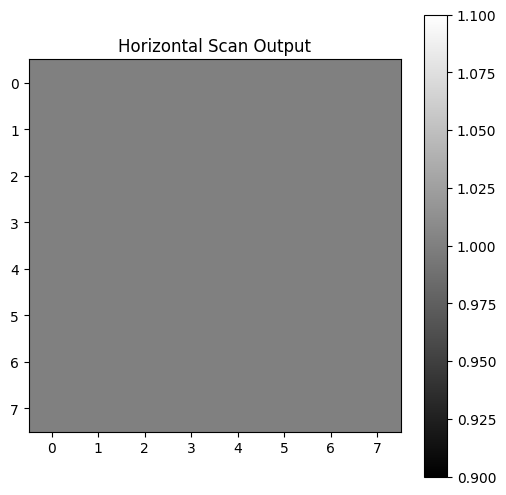

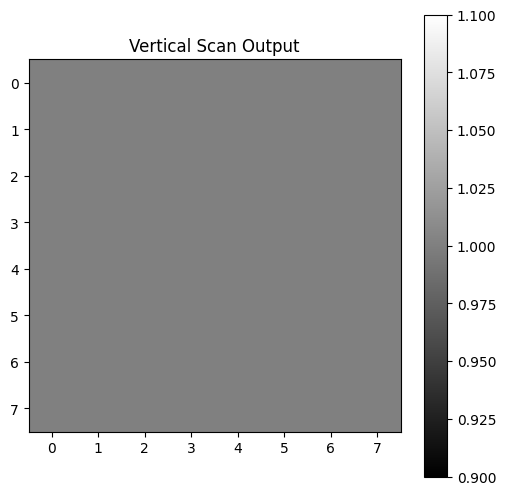

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import array_to_latex
from IPython.display import display

# Define your quantum circuits qc_h_32_rgb and qc_v_32_rgb here

# Use the statevector simulator backend
simulator = Aer.get_backend('statevector_simulator')

# Transpile the circuits
tqc_h_32_rgb = transpile(qc_h_32_rgb, simulator)
tqc_v_32_rgb = transpile(qc_v_32_rgb, simulator)

# Run the simulation
result_h_32_rgb = simulator.run(tqc_h_32_rgb).result()
result_v_32_rgb = simulator.run(tqc_v_32_rgb).result()

# Extract the statevectors
state_vector_h_32_rgb = result_h_32_rgb.get_statevector()
state_vector_v_32_rgb = result_v_32_rgb.get_statevector()

# Convert statevectors to numpy arrays for size checking
state_vector_h_32_rgb_np = np.asarray(state_vector_h_32_rgb)
state_vector_v_32_rgb_np = np.asarray(state_vector_v_32_rgb)

# Print the actual sizes
print("Size of state_vector_h_32_rgb_np:", len(state_vector_h_32_rgb_np))
print("Size of state_vector_v_32_rgb_np:", len(state_vector_v_32_rgb_np))

# Define the number of qubits used in the circuits
num_qubits = len(state_vector_h_32_rgb_np).bit_length() - 1
expected_size = 2 ** num_qubits

# Ensure statevectors have the expected size
assert len(state_vector_h_32_rgb_np) == expected_size, "Size of state_vector_h_32_rgb does not match expected size"
assert len(state_vector_v_32_rgb_np) == expected_size, "Size of state_vector_v_32_rgb does not match expected size"

# Function to process statevectors and reshape them
def process_statevector(state_vector):
    size = int(np.sqrt(len(state_vector)))
    if size * size != len(state_vector):
        raise ValueError(f"Cannot reshape array of size {len(state_vector)} into shape ({size},{size})")
    binary_values = np.array([1 if threshold(state_vector[2 * i + 1].real) else 0 for i in range(len(state_vector) // 2)])
    return np.abs(binary_values).reshape(size, size)

# Function to threshold the amplitudes
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Process the horizontal and vertical scans
try:
    h_edge_scan_img_32_rgb = process_statevector(state_vector_h_32_rgb_np)
    v_edge_scan_img_32_rgb = process_statevector(state_vector_v_32_rgb_np).T
except ValueError as e:
    print(e)

# Function to plot the images
def plot_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray', origin='upper')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plot the Horizontal and Vertical scans
plot_image(h_edge_scan_img_32_rgb, 'Horizontal Scan Output')
plot_image(v_edge_scan_img_32_rgb, 'Vertical Scan Output')


In [52]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt

# Example quantum circuits (define your actual circuits here)
# qc_h_32_rgb = QuantumCircuit(...)
# qc_v_32_rgb = QuantumCircuit(...)

# Use the statevector simulator backend
simulator = AerSimulator()

# Transpile the circuits
tqc_h_32_rgb = transpile(qc_h_32_rgb, simulator)
tqc_v_32_rgb = transpile(qc_v_32_rgb, simulator)

# Run the simulation
result_h_32_rgb = simulator.run(tqc_h_32_rgb).result()
result_v_32_rgb = simulator.run(tqc_v_32_rgb).result()

# Extract the statevectors
state_vector_h_32_rgb = result_h_32_rgb.get_statevector()
state_vector_v_32_rgb = result_v_32_rgb.get_statevector()

# Convert statevectors to numpy arrays for size checking
state_vector_h_32_rgb_np = np.asarray(state_vector_h_32_rgb)
state_vector_v_32_rgb_np = np.asarray(state_vector_v_32_rgb)

# Print sizes of the state vectors
print("Size of Horizontal scan state vector:", state_vector_h_32_rgb_np.size)
print("Size of Vertical scan state vector:", state_vector_v_32_rgb_np.size)

# Check and ensure the size of state vectors
expected_size = 32 * 32  # For a 32x32 image

def check_size(state_vector, name):
    if state_vector.size != expected_size:
        raise ValueError(f"Size of {name} state vector is not correct. Expected {expected_size}, got {state_vector.size}.")

check_size(state_vector_h_32_rgb_np, 'Horizontal scan')
check_size(state_vector_v_32_rgb_np, 'Vertical scan')

# Threshold function to convert amplitudes to binary values
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Function to process statevectors and reshape them into images
def process_statevector(state_vector):
    binary_values = np.array([1 if threshold(state_vector[2 * i + 1].real) else 0 for i in range(len(state_vector) // 2)])
    return np.abs(binary_values).reshape(32, 32)

# Process the horizontal and vertical scans
h_edge_scan_img_32_rgb = process_statevector(state_vector_h_32_rgb_np)
v_edge_scan_img_32_rgb = process_statevector(state_vector_v_32_rgb_np).T

# Function to plot the images
def plot_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray', origin='upper')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plot the Horizontal and Vertical scans
plot_image(h_edge_scan_img_32_rgb, 'Horizontal Scan Output')
plot_image(v_edge_scan_img_32_rgb, 'Vertical Scan Output')


QiskitError: 'No statevector for experiment "None"'

In [54]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt

# Define your quantum circuits qc_h_32_rgb and qc_v_32_rgb here
num_qubits = 10  # Example: Assuming 10 qubits for a 32x32 image
qc_h_32_rgb = QuantumCircuit(num_qubits)
qc_v_32_rgb = QuantumCircuit(num_qubits)

# Example operations on circuits
qc_h_32_rgb.h(range(num_qubits))
qc_v_32_rgb.h(range(num_qubits))

# Use the statevector simulator backend
simulator = AerSimulator()

# Transpile the circuits
tqc_h_32_rgb = transpile(qc_h_32_rgb, simulator)
tqc_v_32_rgb = transpile(qc_v_32_rgb, simulator)

# Run the simulation
try:
    result_h_32_rgb = simulator.run(tqc_h_32_rgb).result()
    result_v_32_rgb = simulator.run(tqc_v_32_rgb).result()
    
    # Debug print to verify the results object
    print("Result H (Raw):", result_h_32_rgb)
    print("Result V (Raw):", result_v_32_rgb)
    
    # Extract the statevectors
    state_vector_h_32_rgb = result_h_32_rgb.get_statevector()
    state_vector_v_32_rgb = result_v_32_rgb.get_statevector()
    
    # Convert statevectors to numpy arrays for size checking
    state_vector_h_32_rgb_np = np.asarray(state_vector_h_32_rgb)
    state_vector_v_32_rgb_np = np.asarray(state_vector_v_32_rgb)

    # Print sizes of the state vectors
    print("Size of Horizontal scan state vector:", state_vector_h_32_rgb_np.size)
    print("Size of Vertical scan state vector:", state_vector_v_32_rgb_np.size)

    # Check and ensure the size of state vectors
    expected_size = 32 * 32  # For a 32x32 image

    def check_size(state_vector, name):
        if state_vector.size != expected_size:
            raise ValueError(f"Size of {name} state vector is not correct. Expected {expected_size}, got {state_vector.size}.")

    check_size(state_vector_h_32_rgb_np, 'Horizontal scan')
    check_size(state_vector_v_32_rgb_np, 'Vertical scan')

    # Threshold function to convert amplitudes to binary values
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

    # Function to process statevectors and reshape them into images
    def process_statevector(state_vector):
        binary_values = np.array([1 if threshold(state_vector[2 * i + 1].real) else 0 for i in range(len(state_vector) // 2)])
        return np.abs(binary_values).reshape(32, 32)

    # Process the horizontal and vertical scans
    h_edge_scan_img_32_rgb = process_statevector(state_vector_h_32_rgb_np)
    v_edge_scan_img_32_rgb = process_statevector(state_vector_v_32_rgb_np).T

    # Function to plot the images
    def plot_image(image, title):
        plt.figure(figsize=(6, 6))
        plt.imshow(image, cmap='gray', origin='upper')
        plt.title(title)
        plt.colorbar()
        plt.show()

    # Plot the Horizontal and Vertical scans
    plot_image(h_edge_scan_img_32_rgb, 'Horizontal Scan Output')
    plot_image(v_edge_scan_img_32_rgb, 'Vertical Scan Output')

except Exception as e:
    print(f"An error occurred: {e}")


Result H (Raw): Result(backend_name='aer_simulator', backend_version='0.15.0', qobj_id='', job_id='23180dd7-5bf9-4ee0-92f6-a3a80046fd29', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(creg_sizes=[], global_phase=0.0, memory_slots=0, n_qubits=10, name='circuit-206', qreg_sizes=[['q', 10]], metadata={}), status=DONE, seed_simulator=4248437152, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 0, 'num_clbits': 0, 'time_taken': 2.3e-05, 'input_qubit_map': [], 'max_memory_mb': 7914, 'measure_sampling': False, 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1}, time_taken=2.3e-05)], date=2024-08-24T16:51:32.352593, status=COMPLETED, header=None, metadata={'omp_enabled': True, 'parallel_experiments': 1, 'max_memory_mb': 791

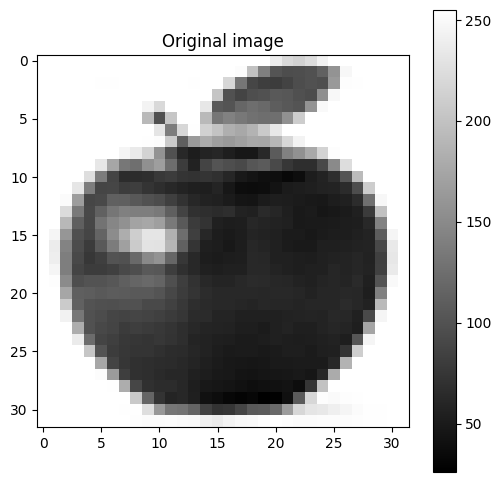

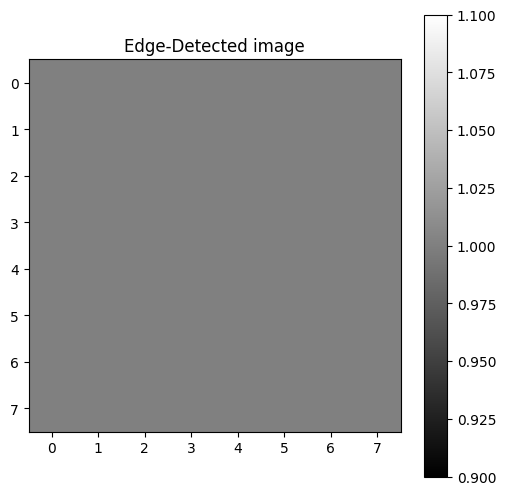

In [55]:
# Combining the horizontal and vertical component of the result by or operator
edge_scan_image_32_rgb = h_edge_scan_img_32_rgb | v_edge_scan_img_32_rgb

# Plotting the original and edge-detected images
plot_image(imggg_, 'Original image')
plot_image(edge_scan_image_32_rgb, 'Edge-Detected image')